In [25]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Inlezen van de dataset en overzicht

In [111]:
#Inlezen van de dataset
dataset = pd.read_csv('combats_new.csv')
dataset.head(10)

,ditto,rhyhorn,-5,light screen,confuse ray,peck,razor wind,take down,hydro pump,leech seed,ice beam,false
0,machamp,machamp,47,thunder shock,comet punch,headbutt,counter,mimic,strength,growl,thunderbolt,True
1,tentacool,haunter,79,ice beam,roar,meditate,dizzy punch,sonic boom,barrage,earthquake,thunder punch,True
2,tentacool,rattata,67,guillotine,psychic,stun spore,string shot,tail whip,guillotine,metronome,roar,True
3,fearow,charizard,16,ice beam,slash,hypnosis,swift,withdraw,explosion,jump kick,dizzy punch,True
4,alakazam,pinsir,9,twineedle,stomp,body slam,fire punch,focus energy,egg bomb,roar,explosion,False
5,staryu,hypno,3,aurora beam,recover,hyper fang,ice beam,fire blast,glare,double kick,clamp,True
6,ponyta,victreebel,-37,splash,headbutt,sky attack,fly,poison powder,thunder,aurora beam,tri attack,False
7,porygon,drowzee,-4,slash,tackle,take down,explosion,recover,conversion,hypnosis,flash,True
8,voltorb,gastly,35,bind,tackle,agility,pay day,peck,slash,jump kick,smog,True
9,vileplume,jigglypuff,59,meditate,bide,teleport,scratch,glare,acid,rest,thrash,True


In [113]:
pokemon = pd.read_csv('pokemons.csv')
#pokemon.head(10)

#data = pd.DataFrame(pokemon['identifier'])
#print(pd.get_dummies(data))

# Convert strings categorical names to integers
integerized_data = preprocessing.LabelEncoder().fit_transform(pokemon["identifier"])

# View data
integerized_data

# Convert integer categorical representations to OneHot encodings
numbers = preprocessing.OneHotEncoder().fit_transform(integerized_data.reshape(-1,1)).toarray()

#pokemon['identifier'][1]
#numbers[1]

for i in range(0,151):
    str1 = "("
    for element in numbers[i]:
        str1 = str1 + str(element) + ", "

    str1 = str1[:-2] + ")"
    str1 
    
pokemon_map = {}
    
#pokemon_map.append(pokemon['identifier'][1] + ': ' + str1)

#pokemon_map

for i in range(0,151):
    str1 = "("
    for element in numbers[i]:
        str1 = str1 + str(int(element)) + ","

    str1 = str1[:-2] + ")"
    str1
    
    pokemon_map.update({pokemon['identifier'][i]: str1})
    
dataset['ditto'] = dataset['ditto'].map(pokemon_map)

In [114]:
dataset.head(10)

,ditto,rhyhorn,-5,light screen,confuse ray,peck,razor wind,take down,hydro pump,leech seed,ice beam,false
0,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",machamp,47,thunder shock,comet punch,headbutt,counter,mimic,strength,growl,thunderbolt,True
1,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",haunter,79,ice beam,roar,meditate,dizzy punch,sonic boom,barrage,earthquake,thunder punch,True
2,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",rattata,67,guillotine,psychic,stun spore,string shot,tail whip,guillotine,metronome,roar,True
3,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",charizard,16,ice beam,slash,hypnosis,swift,withdraw,explosion,jump kick,dizzy punch,True
4,"(0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",pinsir,9,twineedle,stomp,body slam,fire punch,focus energy,egg bomb,roar,explosion,False
5,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",hypno,3,aurora beam,recover,hyper fang,ice beam,fire blast,glare,double kick,clamp,True
6,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",victreebel,-37,splash,headbutt,sky attack,fly,poison powder,thunder,aurora beam,tri attack,False
7,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",drowzee,-4,slash,tackle,take down,explosion,recover,conversion,hypnosis,flash,True
8,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",gastly,35,bind,tackle,agility,pay day,peck,slash,jump kick,smog,True
9,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",jigglypuff,59,meditate,bide,teleport,scratch,glare,acid,rest,thrash,True


In [118]:
pokemon_map

{'abra': '(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,)',
 'aerodactyl': '(0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,)',
 'alakazam': '(0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,)',
 'arbok': '(0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [43]:
# Beschrijvende statistische analyse
dataset.describe()

,ditto,-5
count,9999.000000,9999.000000
mean,0.992699,-0.153015
std,0.085136,40.460971
min,0.000000,-97.000000
25%,1.000000,-30.000000
50%,1.000000,0.000000
75%,1.000000,29.000000
max,1.000000,97.000000


# Visualiseren van de dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCF6973FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DCF6CA5390>]], dtype=object)

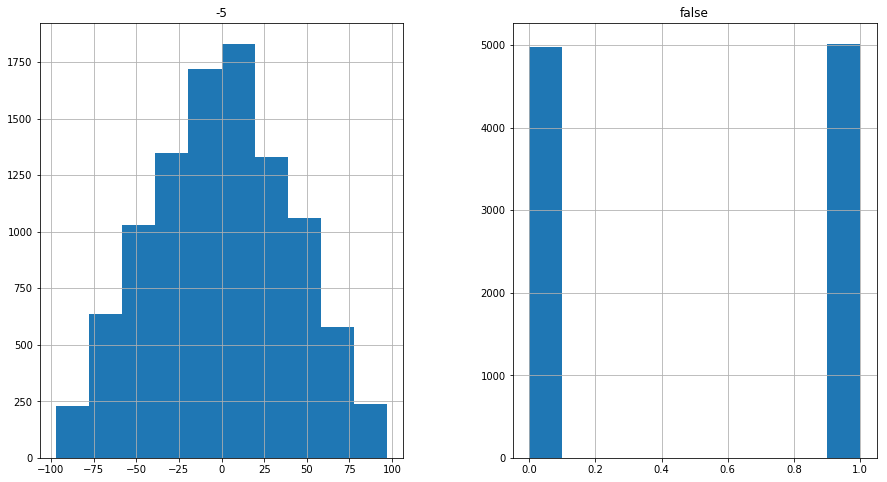

In [7]:
# Histogram
dataset.hist(figsize=(15,8))

-5          Axes(0.125,0.657941;0.227941x0.222059)
false    Axes(0.398529,0.657941;0.227941x0.222059)
dtype: object

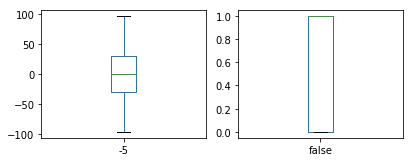

In [8]:
# Box plot
dataset.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

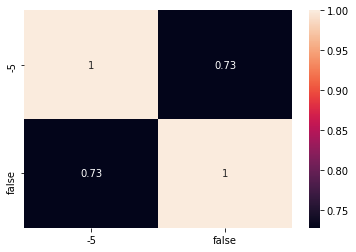

In [9]:
# Correlation plot
Corr=dataset[dataset.columns].corr() 
sns.heatmap(Corr, annot=True)

# Preprocessing en opsplitsen in training en test set

In [15]:
# Opsplitsen in features en targets
features = list(dataset.columns[:8])
print(features)
X = dataset[features].values 

y= dataset['false'].values

# Opsplitsen van data in een training en test set

print(X.shape)

['ditto', 'rhyhorn', '-5', 'light screen', 'confuse ray', 'peck', 'razor wind', 'take down']
(9999, 8)


# Logistic regression

## Initialiseren en trainen van de logistic regression classifier

In [16]:
# Initialiseren van de logistic regression classifier

logreg = linear_model.LogisticRegression(C=1,class_weight= None)

#logreg = linear_model.LogisticRegression(C=1,class_weight= 'balanced')

In [17]:
# Training van het model
logreg.fit(X, y)

print('De bias = theta_0: ', logreg.intercept_)
print('De coefficienten theta: ',logreg.coef_)

ValueError: could not convert string to float: 'petal dance'

## Testen van het model op de test set

In [32]:
# Testen van het model op de test set

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

             precision    recall  f1-score   support

          0       0.75      0.85      0.80        48
          1       0.67      0.50      0.57        28

avg / total       0.72      0.72      0.71        76

[[41  7]
 [14 14]]
72.3684210526


## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [50]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

print(patient)
y_patient = logreg.predict(patient.reshape(1,-1))
y_patient_prob = logreg.predict_proba(patient.reshape(1,-1))
print(y_patient)
print(y_patient_prob)

if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')

[[-0.41420941  0.30209759  0.25992289 -0.84670314 -1.13434945 -1.2724308
  -1.0725144   0.62170047]]
[0]
[[ 0.85859249  0.14140751]]
Patiënt heeft geen diabetes


# SVM zonder kernel (= lineaire kernel)

## Initialiseren en trainen van SVM 

In [67]:
SVMlinear = svm.SVC(kernel='linear',C=0.1)
SVMlinear.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testen van het model op test set

In [68]:
y_pred = SVMlinear.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

             precision    recall  f1-score   support

          0       0.74      0.90      0.81        48
          1       0.72      0.46      0.57        28

avg / total       0.73      0.74      0.72        76

[[43  5]
 [15 13]]
73.6842105263


## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [70]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

y_patient = SVMlinear.predict(patient.reshape(1,-1))
print(y_patient)
if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')


[0]
Patiënt heeft geen diabetes


# SVM met kernel

## Initialiseren en trainen van de SVM

In [73]:
SVMkernel = svm.SVC(kernel='rbf',C=0.1,gamma=0.1)
#SVMkernel = svm.SVC(kernel='poly',C=1)
SVMkernel.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testen van het model op test set

In [74]:
y_pred = SVMkernel.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

             precision    recall  f1-score   support

          0       0.69      0.98      0.81        48
          1       0.88      0.25      0.39        28

avg / total       0.76      0.71      0.66        76

[[47  1]
 [21  7]]
71.0526315789


## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [75]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

y_patient = SVMmodel.predict(patient.reshape(1,-1))
print(y_patient)
if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')


[0]
Patiënt heeft geen diabetes


# Gridsearch en cross-validation

## Gridsearch op logistic regression

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
paramaters = [
             {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000]}                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 4,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Best accuracy :  0.802631578947
Best parameters : {'C': 100}
             precision    recall  f1-score   support

          0       0.73      0.85      0.79        48
          1       0.65      0.46      0.54        28

avg / total       0.70      0.71      0.70        76

[[41  7]
 [15 13]]
71.0526315789


## Gridsearch op SVM

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
paramaters = [ 
        {'kernel': ['linear'], 'C': np.linspace(1,20,100)},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2]},
        {'kernel': ['poly'], 'C':[1, 10]} ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 4,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 




Best accuracy :  0.805921052632
Best parameters : {'C': 1.3838383838383839, 'kernel': 'linear'}
             precision    recall  f1-score   support

          0       0.75      0.88      0.81        48
          1       0.70      0.50      0.58        28

avg / total       0.73      0.74      0.73        76

[[42  6]
 [14 14]]
73.6842105263
